In [1]:
from pathlib import Path
import pandas as pd
DATA_DIR = Path("../data/raw")
train_path = DATA_DIR / "training.csv"
val_path   = DATA_DIR / "validation.csv"
test_path  = DATA_DIR / "test.csv"
train_df = pd.read_csv(train_path)
val_df   = pd.read_csv(val_path)
test_df  = pd.read_csv(test_path)
train_df.shape, val_df.shape, test_df.shape

((16000, 2), (2000, 2), (2000, 2))

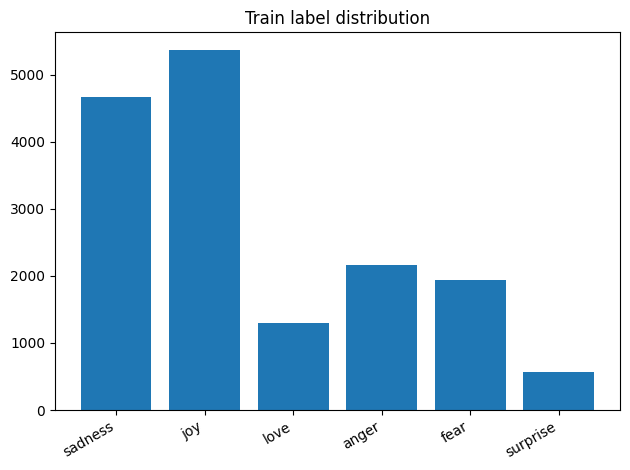

label
0    4666
1    5362
2    1304
3    2159
4    1937
5     572
Name: count, dtype: int64

In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("../data/raw/training.csv")

LABEL2EMOTION = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise",
}

fig_dir = Path("../reports/figures")
fig_dir.mkdir(parents=True, exist_ok=True)

counts = train_df["label"].value_counts().sort_index()

plt.figure()
plt.bar([LABEL2EMOTION[i] for i in counts.index], counts.values)
plt.xticks(rotation=30, ha="right")
plt.title("Train label distribution")
plt.tight_layout()
plt.savefig(fig_dir / "label_distribution_train.png", dpi=200)
plt.show()

counts

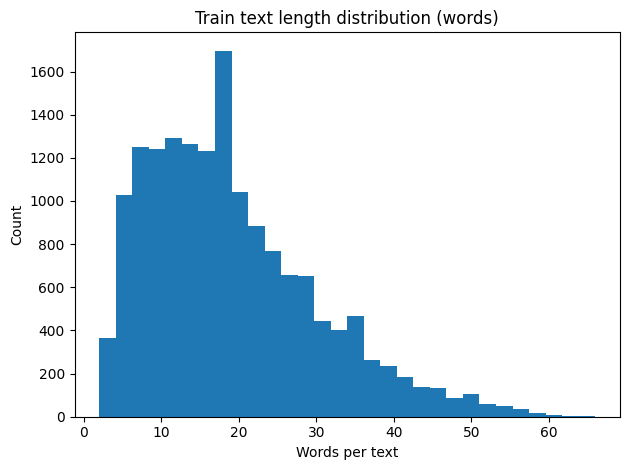

count    16000.000000
mean        19.166313
std         10.986905
min          2.000000
25%         11.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: text, dtype: float64

In [5]:
lengths = train_df["text"].astype(str).str.split().str.len()

plt.figure()
plt.hist(lengths, bins=30)
plt.title("Train text length distribution (words)")
plt.xlabel("Words per text")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(fig_dir / "text_length_distribution_train.png", dpi=200)
plt.show()

lengths.describe()
